In [93]:
import warnings
warnings.filterwarnings('ignore')

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [95]:
AD = pd.read_csv('application_data.csv')

In [96]:
pd.set_option('display.max_columns',122)
pd.set_option('display.max_rows',100)

### Data Inspection

In [97]:
for x in AD.columns:
    print(x)
    print(AD[x].describe())
    print('--------------')

SK_ID_CURR
count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64
--------------
TARGET
count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64
--------------
NAME_CONTRACT_TYPE
count         307511
unique             2
top       Cash loans
freq          278232
Name: NAME_CONTRACT_TYPE, dtype: object
--------------
CODE_GENDER
count     307511
unique         3
top            F
freq      202448
Name: CODE_GENDER, dtype: object
--------------
FLAG_OWN_CAR
count     307511
unique         2
top            N
freq      202924
Name: FLAG_OWN_CAR, dtype: object
--------------
FLAG_OWN_REALTY
count     307511
unique         2
top            Y
freq      213312
Name: FLAG_OWN_REALTY,

### Impute/ Remove missing Values

In [98]:
# Percentage of missing values in each column of application_data dataset
AD_missing = AD.isna().mean().sort_values(ascending = False)
AD_missing = AD_missing*100
AD_missing

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

In [99]:
# columns to be dropped with missing values greater than 47% in the application data 
col_drop = list(AD_missing[AD_missing.values>47].index)
print(col_drop)

['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE

In [100]:
AD.drop(col_drop,axis = 1,inplace = True)

In [101]:
# Recalculating the Percentage of missing values in each column of application_data dataset
AD.isna().mean().sort_values(ascending = False)

OCCUPATION_TYPE                0.313455
EXT_SOURCE_3                   0.198253
AMT_REQ_CREDIT_BUREAU_YEAR     0.135016
AMT_REQ_CREDIT_BUREAU_QRT      0.135016
AMT_REQ_CREDIT_BUREAU_MON      0.135016
AMT_REQ_CREDIT_BUREAU_WEEK     0.135016
AMT_REQ_CREDIT_BUREAU_DAY      0.135016
AMT_REQ_CREDIT_BUREAU_HOUR     0.135016
NAME_TYPE_SUITE                0.004201
OBS_30_CNT_SOCIAL_CIRCLE       0.003320
DEF_30_CNT_SOCIAL_CIRCLE       0.003320
OBS_60_CNT_SOCIAL_CIRCLE       0.003320
DEF_60_CNT_SOCIAL_CIRCLE       0.003320
EXT_SOURCE_2                   0.002146
AMT_GOODS_PRICE                0.000904
AMT_ANNUITY                    0.000039
CNT_FAM_MEMBERS                0.000007
DAYS_LAST_PHONE_CHANGE         0.000003
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_21               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000


### Handling Missing values in OCCUPATION_TYPE categorical column 

In [102]:
# handling categorical column with missing values >13 % we impute them as 'Others'
AD.OCCUPATION_TYPE = AD.OCCUPATION_TYPE.fillna('Others')


### Handling Missing values in NAME_TYPE_SUITE Categorical column

In [103]:
# handling categorical columns with missing values <13 % we impute them with mode
AD.NAME_TYPE_SUITE= AD.NAME_TYPE_SUITE.fillna(AD.NAME_TYPE_SUITE.mode()[0])

### Handling CODE_GENDER category Column

In [104]:
AD.CODE_GENDER.unique()

array(['M', 'F', 'XNA'], dtype=object)

In [105]:
# percentage of XNA is CODE_GENDER is 0.0013 we can impute the XNA values with mode as it is categorical column
AD.CODE_GENDER.replace('XNA',AD.CODE_GENDER.mode()[0],inplace = True)

In [106]:
AD.CODE_GENDER.unique()

array(['M', 'F'], dtype=object)

In [107]:
AD.CODE_GENDER.value_counts(normalize = True)

F    0.658357
M    0.341643
Name: CODE_GENDER, dtype: float64

### Data Standardization

In [108]:
# We see that DAYS_BIRTH and DAYS_EMPLOYED are AGE column and WORK EXPERIENCE column given in 
# negative integers and we convert them into AGE in years and WORK EXPERIENCE in Years
AD.DAYS_BIRTH = abs((AD.DAYS_BIRTH)/ 365.25)
AD.DAYS_EMPLOYED = abs((AD.DAYS_EMPLOYED)/ 365.25)

In [109]:
# We convert the data types of AGE and WORK EXPERIENCE columns as Integer type
AD.DAYS_BIRTH = AD.DAYS_BIRTH.astype(int)
AD.DAYS_EMPLOYED = AD.DAYS_EMPLOYED.astype(int)

In [110]:
# We rename the columns as AGE and WORK EXPERIENCE 
AD.rename(columns = {'DAYS_BIRTH' : 'AGE','DAYS_EMPLOYED' : 'WORK_EXPERIENCE'},inplace =True)

## List of all categorical and numerical columns 

In [111]:
categorical_column_APP = []
for x in AD.columns:
    if AD[x].dtype == 'object':
        categorical_column_APP.append(x)

In [112]:
categorical_column_APP

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [113]:
numerical_column_APP = []
for x in AD.columns:
    if AD[x].dtype != 'object':
        numerical_column_APP.append(x)


In [114]:
numerical_column_APP

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'AGE',
 'WORK_EXPERIENCE',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12'

### Identifying Outliers - we take list of 8 numerical columns

In [115]:
numerical_columns = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE','WORK_EXPERIENCE','CNT_FAM_MEMBERS','CNT_CHILDREN']

AMT_INCOME_TOTAL


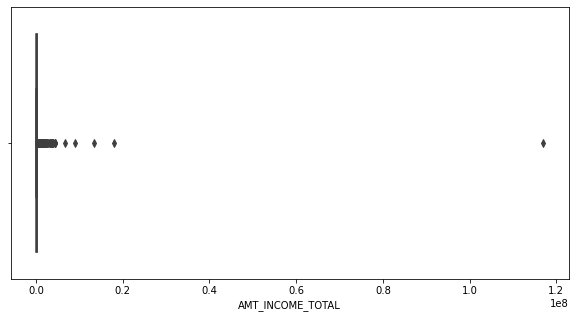

AMT_CREDIT


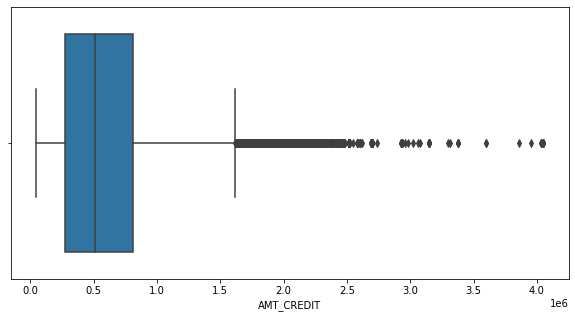

AMT_ANNUITY


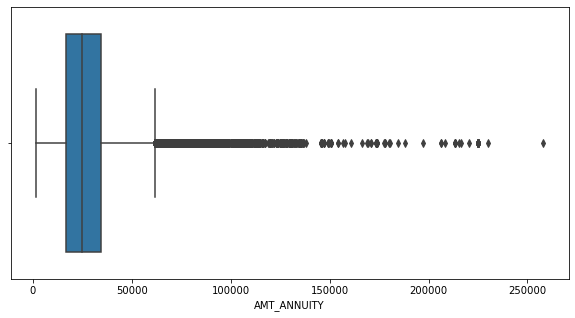

AMT_GOODS_PRICE


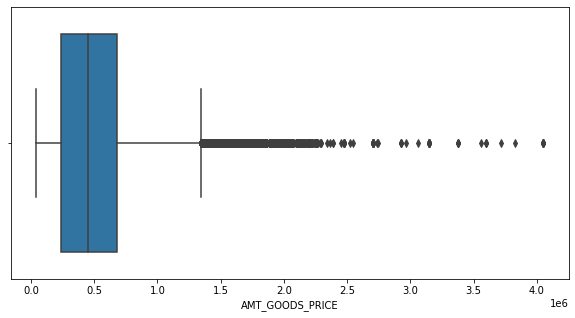

AGE


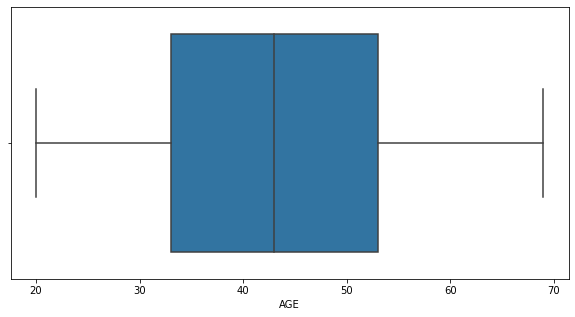

WORK_EXPERIENCE


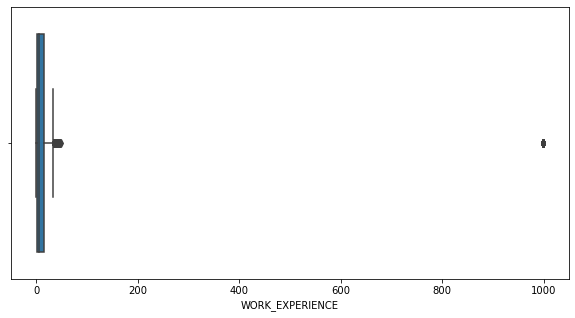

CNT_FAM_MEMBERS


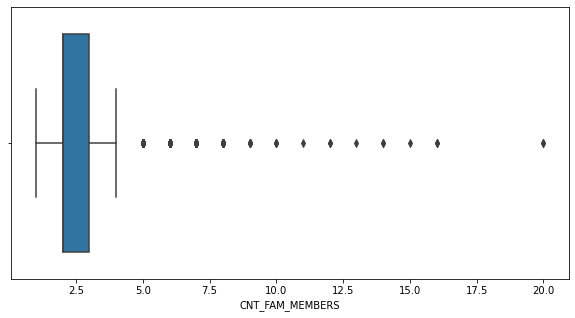

CNT_CHILDREN


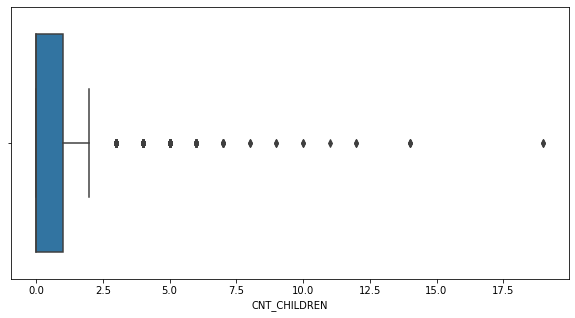

In [116]:
for x in numerical_columns:
    print(x)
    plt.figure(figsize = [10,5])
    sns.boxplot(AD[x])
    plt.show()

## Univariate Analysis

### AGE Column

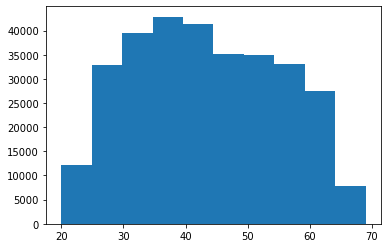

In [117]:
plt.hist(AD.AGE)
plt.show()

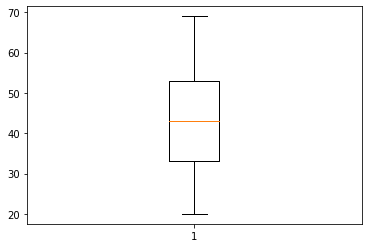

In [118]:
#plot the boxplot of age variable.
plt.boxplot(AD.AGE)
plt.show()

## Segmented Univariate Analysis - Outliers if present we can group them and keep it in our data set
### Binning of AGE_GROUP

In [119]:
AD['AGE_GROUP'] = pd.cut(AD.AGE, bins = [0,20,30,40,50,60,9999],labels = ['<20','20-30','30-40','40-50','50-60','60+'])

In [123]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.
AD.AGE_GROUP.value_counts(normalize = True)

30-40    0.270598
40-50    0.241770
50-60    0.220688
20-30    0.172231
60+      0.094709
<20      0.000003
Name: AGE_GROUP, dtype: float64

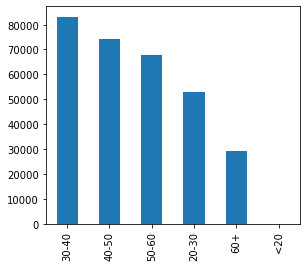

In [124]:
plt.figure(figsize = [10,4])
plt.subplot(1,2,1)
AD.AGE_GROUP.value_counts().plot.bar()
plt.show()


### Binning Income Group

In [125]:
AD['INCOME_GROUP'] = pd.cut(AD.AMT_INCOME_TOTAL, bins = [0,100000,200000,300000,400000,500000,600000, 9999999999],labels = ['<100000','100000-200000','200000-300000','300000-400000','400000-500000','500000-600000','600000+'])

In [126]:
AD.INCOME_GROUP.value_counts(normalize = True)

100000-200000    0.506967
200000-300000    0.211947
<100000          0.207141
300000-400000    0.047725
400000-500000    0.017434
600000+          0.005226
500000-600000    0.003561
Name: INCOME_GROUP, dtype: float64

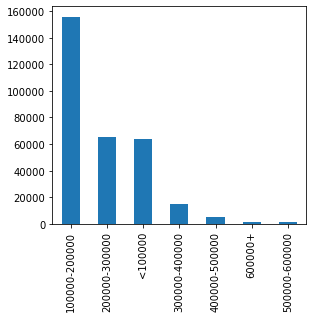

In [127]:
plt.figure(figsize = [10,4])
plt.subplot(1,2,1)
AD.INCOME_GROUP.value_counts().plot.bar()
plt.show()

### Splitting APPLICATION DATA with TARGET ==1 and APPLICATION DATA with TARGET ==0

In [128]:
AD_1 = AD[AD.TARGET==1]

In [129]:
AD_0 = AD[AD.TARGET==0]

### Finding if there is DATA Imbalance in TARGET Column

In [130]:
# Data imbalance in percentage of TARGET Column
AD.TARGET.value_counts(normalize = True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

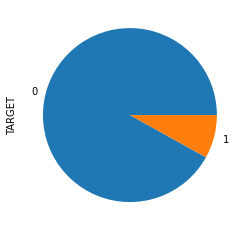

In [131]:
# Data imbalance - visualization of TARGET Column
AD.TARGET.value_counts(normalize = True).plot.pie()
plt.show()

## Ratio of Data Imbalance

In [132]:
AD_0.shape[0]/AD_1.shape[0]

11.387150050352467

#### Analysis Result : There is 1 applicant with payment difficulties for every 11 applicants

### Univariate Analysis - Categorical Columns for TARGET = 0 and TARGET =1


### 1. CODE_GENDER

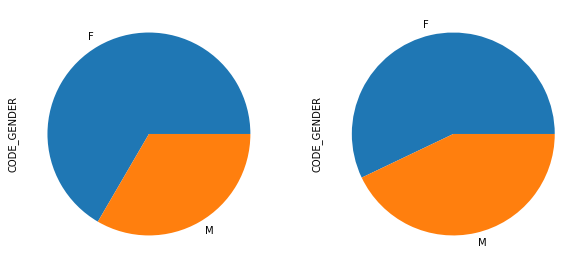

In [133]:
plt.figure(figsize = [10,5])
plt.subplot(1,2,1)
AD_0['CODE_GENDER'].value_counts(normalize = True).plot.pie()
plt.subplot(1,2,2)
AD_1['CODE_GENDER'].value_counts(normalize = True).plot.pie()
plt.show()

In [134]:
AD.CODE_GENDER.value_counts(normalize = True)

F    0.658357
M    0.341643
Name: CODE_GENDER, dtype: float64

### 2. NAME_EDUCATION_TYPE

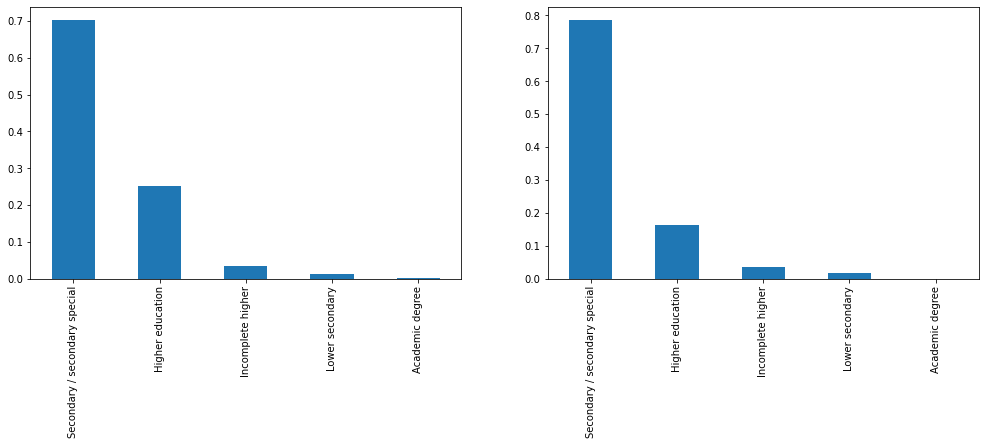

In [135]:
plt.figure(figsize = [17,5])
plt.subplot(1,2,1)
AD_0['NAME_EDUCATION_TYPE'].value_counts(normalize = True).plot.bar()
plt.subplot(1,2,2)
AD_1['NAME_EDUCATION_TYPE'].value_counts(normalize = True).plot.bar()
plt.show()


In [136]:
AD.NAME_EDUCATION_TYPE.value_counts(normalize = True)

Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64

### 3. NAME_FAMILY_STATUS 

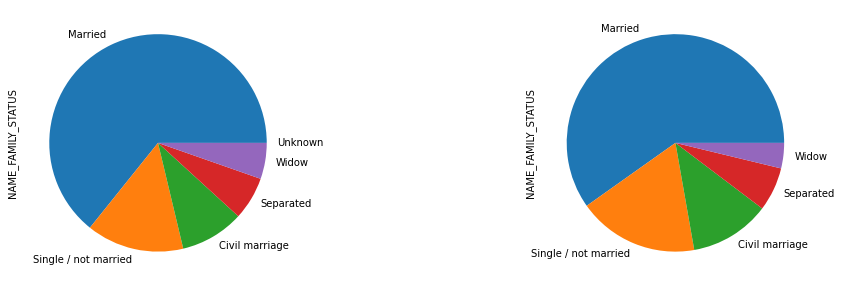

In [137]:
plt.figure(figsize = [17,5])
plt.subplot(1,2,1)
AD_0['NAME_FAMILY_STATUS'].value_counts(normalize = True).plot.pie()
plt.subplot(1,2,2)
AD_1['NAME_FAMILY_STATUS'].value_counts(normalize = True).plot.pie()
plt.show()


In [138]:
AD.NAME_FAMILY_STATUS.value_counts(normalize = True)

Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64

### 4. NAME_HOUSING_TYPE

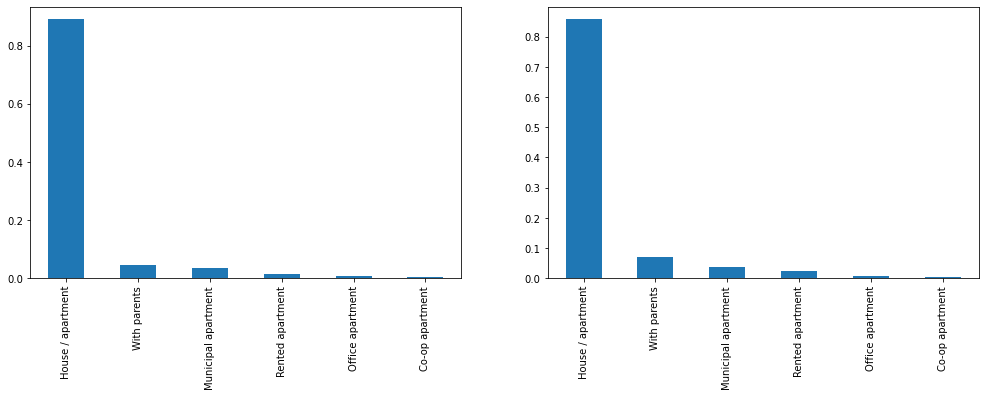

In [139]:
plt.figure(figsize = [17,5])
plt.subplot(1,2,1)
AD_0['NAME_HOUSING_TYPE'].value_counts(normalize = True).plot.bar()
plt.subplot(1,2,2)
AD_1['NAME_HOUSING_TYPE'].value_counts(normalize = True).plot.bar()
plt.show()

In [140]:
AD.NAME_HOUSING_TYPE.value_counts(normalize = True)

House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: NAME_HOUSING_TYPE, dtype: float64

### 5. OCCUPATION_TYPE

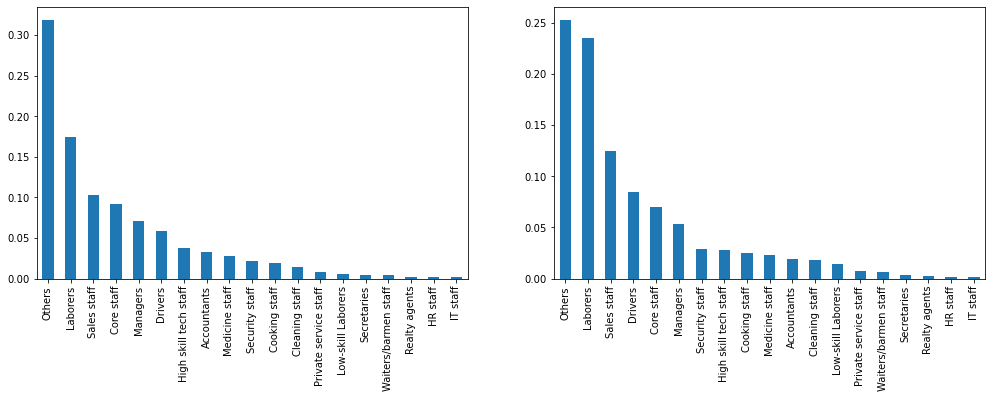

In [141]:
plt.figure(figsize = [17,5])
plt.subplot(1,2,1)
AD_0['OCCUPATION_TYPE'].value_counts(normalize = True).plot.bar()
plt.subplot(1,2,2)
AD_1['OCCUPATION_TYPE'].value_counts(normalize = True).plot.bar()
plt.show()

### Univariate analysis - Numerical Columns for TARGET = 0 and TARGET = 1

In [142]:
# numerical columns with TARGET = 0 and data distribution in quantile
for x in numerical_columns:
    print(AD_0[x].quantile([0.25,0.5,0.75,0.8,0.9,0.95,0.99,1]))

0.25      112500.0
0.50      148500.0
0.75      202500.0
0.80      225000.0
0.90      270000.0
0.95      337500.0
0.99      486000.0
1.00    18000090.0
Name: AMT_INCOME_TOTAL, dtype: float64
0.25     270000.0
0.50     517788.0
0.75     810000.0
0.80     900000.0
0.90    1157670.0
0.95    1350000.0
0.99    1886850.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64
0.25     16456.5
0.50     24876.0
0.75     34749.0
0.80     37702.8
0.90     46134.0
0.95     53455.5
0.99     70713.0
1.00    258025.5
Name: AMT_ANNUITY, dtype: float64
0.25     238500.0
0.50     450000.0
0.75     688500.0
0.80     855000.0
0.90    1125000.0
0.95    1345500.0
0.99    1800000.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64
0.25    34.0
0.50    43.0
0.75    54.0
0.80    56.0
0.90    60.0
0.95    63.0
0.99    66.0
1.00    69.0
Name: AGE, dtype: float64
0.25      2.0
0.50      6.0
0.75     16.0
0.80     27.0
0.90    999.0
0.95    999.0
0.99    999.0
1.00    999.0
Name: WORK_EXPERIENCE, dtype: float64


In [143]:
# numerical columns with TARGET = 1 and data distribution in quantile
for x in numerical_columns:
    print(AD_1[x].quantile([0.25,0.5,0.75,0.8,0.9,0.95,0.99,1]))

0.25       112500.0
0.50       135000.0
0.75       202500.0
0.80       202500.0
0.90       256500.0
0.95       315000.0
0.99       450000.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64
0.25     284400.00
0.50     497520.00
0.75     733315.50
0.80     808650.00
0.90    1042560.00
0.95    1256400.00
0.99    1711340.64
1.00    4027680.00
Name: AMT_CREDIT, dtype: float64
0.25     17361.0
0.50     25263.0
0.75     32976.0
0.80     35685.0
0.90     42642.0
0.95     49866.3
0.99     62568.0
1.00    149211.0
Name: AMT_ANNUITY, dtype: float64
0.25     238500.0
0.50     450000.0
0.75     675000.0
0.80     675000.0
0.90     900000.0
0.95    1125000.0
0.99    1575000.0
1.00    3600000.0
Name: AMT_GOODS_PRICE, dtype: float64
0.25    31.0
0.50    39.0
0.75    49.0
0.80    52.0
0.90    57.0
0.95    61.0
0.99    65.0
1.00    68.0
Name: AGE, dtype: float64
0.25      1.0
0.50      3.0
0.75      8.0
0.80     11.0
0.90    999.0
0.95    999.0
0.99    999.0
1.00    999.0
Name: WORK_EXPERIENCE,

In [144]:
AD.AMT_INCOME_TOTAL.quantile([0.25,0.5,0.75,0.8,0.9,0.95,0.99,1])

0.25       112500.0
0.50       147150.0
0.75       202500.0
0.80       225000.0
0.90       270000.0
0.95       337500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [145]:
AD.AMT_CREDIT.quantile([0.25,0.5,0.75,0.8,0.9,0.95,0.99,1])

0.25     270000.0
0.50     513531.0
0.75     808650.0
0.80     900000.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

In [146]:
AD.WORK_EXPERIENCE.quantile([0.25,0.5,0.75,0.8,0.9,0.95,0.99,1])

0.25      2.0
0.50      6.0
0.75     15.0
0.80     25.0
0.90    999.0
0.95    999.0
0.99    999.0
1.00    999.0
Name: WORK_EXPERIENCE, dtype: float64

## CORRELATION between Numerical Columns

In [147]:
AD.TARGET.mean()

0.08072881945686496

In [148]:
AD_CORR = AD[numerical_columns].corr().abs()
AD_CORR

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,WORK_EXPERIENCE,CNT_FAM_MEMBERS,CNT_CHILDREN
AMT_INCOME_TOTAL,1.000000,0.156870,0.191657,0.159610,0.027270,0.063836,0.016342,0.012882
AMT_CREDIT,0.156870,1.000000,0.770138,0.986968,0.055462,0.064318,0.063160,0.002145
AMT_ANNUITY,0.191657,0.770138,1.000000,0.775109,0.009450,0.102856,0.075539,0.021374
AMT_GOODS_PRICE,0.159610,0.986968,0.775109,1.000000,0.053465,0.062264,0.061185,0.001827
AGE,0.027270,0.055462,0.009450,0.053465,1.000000,0.623900,0.278860,0.330876
WORK_EXPERIENCE,0.063836,0.064318,0.102856,0.062264,0.623900,1.000000,0.234365,0.241583
CNT_FAM_MEMBERS,0.016342,0.063160,0.075539,0.061185,0.278860,0.234365,1.000000,0.879161
CNT_CHILDREN,0.012882,0.002145,0.021374,0.001827,0.330876,0.241583,0.879161,1.000000


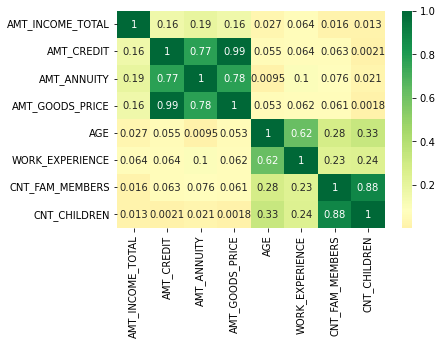

In [149]:
sns.heatmap(AD_CORR,annot = True,cmap='RdYlGn',center = 0.080729)
plt.show()

## Bivariate Analysis

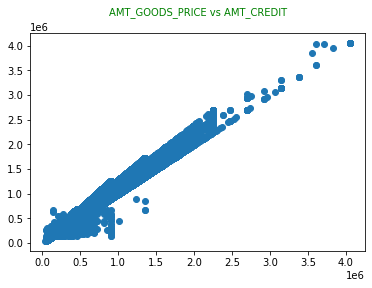

In [150]:
#plot the scatter plot of AMT_GOODS_PRICE and AMT_CREDIT in APPLICATION_DATA
plt.title("AMT_GOODS_PRICE vs AMT_CREDIT\n", fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Green'})
plt.scatter(AD.AMT_GOODS_PRICE,AD.AMT_CREDIT)
plt.show()

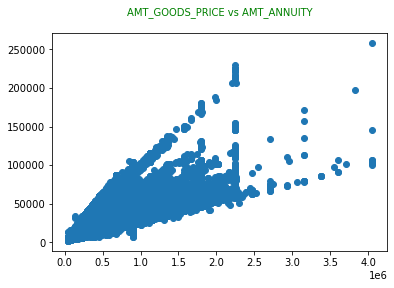

In [151]:
plt.title("AMT_GOODS_PRICE vs AMT_ANNUITY\n", fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Green'})
plt.scatter(AD.AMT_GOODS_PRICE,AD.AMT_ANNUITY)
plt.show()

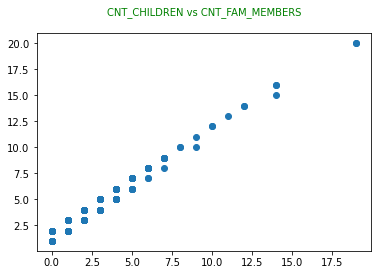

In [152]:
plt.title("CNT_CHILDREN vs CNT_FAM_MEMBERS\n", fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Green'})
plt.scatter(AD.CNT_CHILDREN,AD.CNT_FAM_MEMBERS)
plt.show()

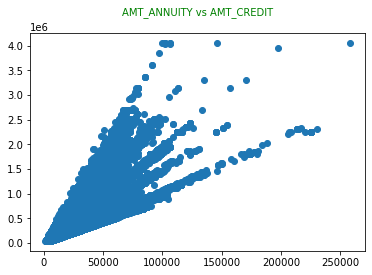

In [153]:
plt.title("AMT_ANNUITY vs AMT_CREDIT\n", fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Green'})
plt.scatter(AD.AMT_ANNUITY,AD.AMT_CREDIT)
plt.show()

In [154]:
AD.TARGET.unique()

array([1, 0], dtype=int64)

In [155]:
categorical_column_APP

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

### Categorical columns(ALL) vs Categorical(TARGET column)
    

NAME_CONTRACT_TYPE


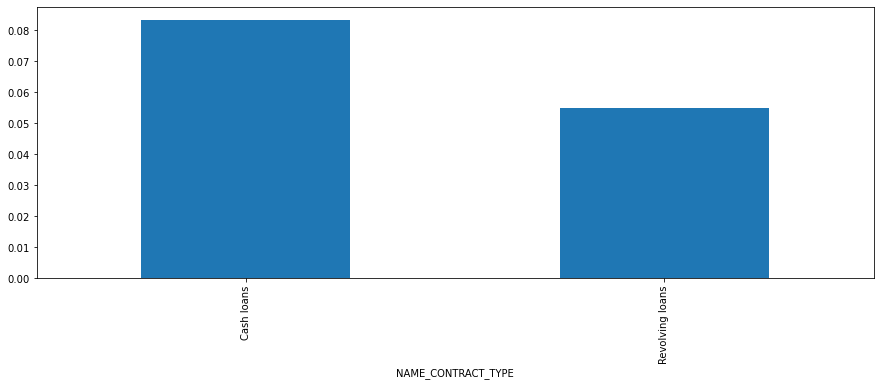

CODE_GENDER


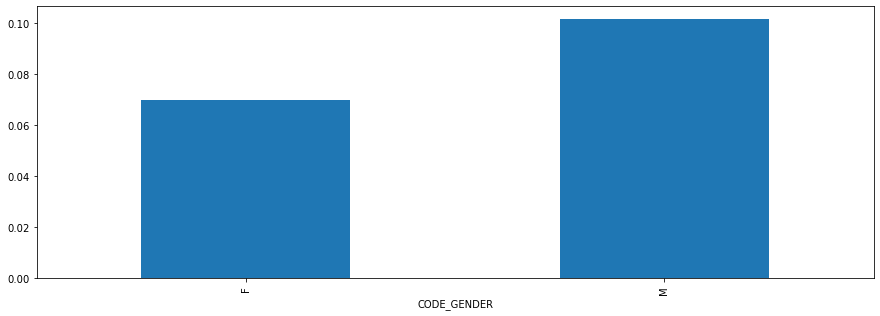

FLAG_OWN_CAR


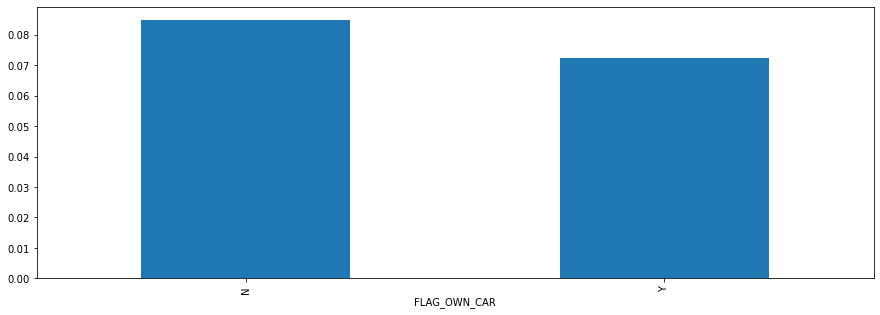

FLAG_OWN_REALTY


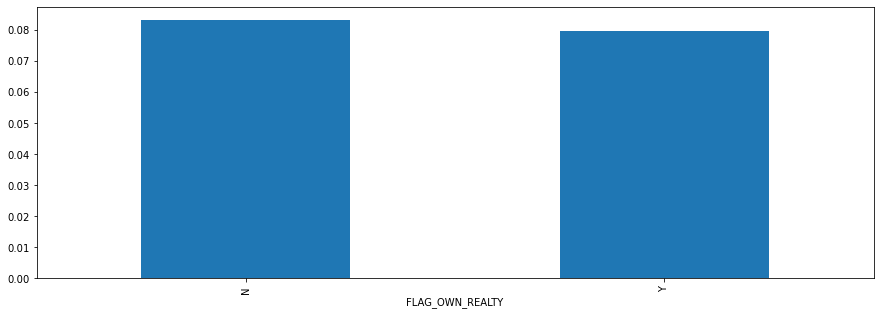

NAME_TYPE_SUITE


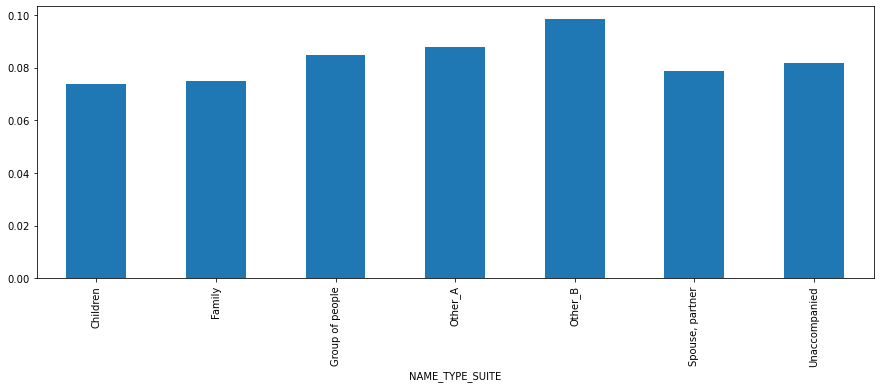

NAME_INCOME_TYPE


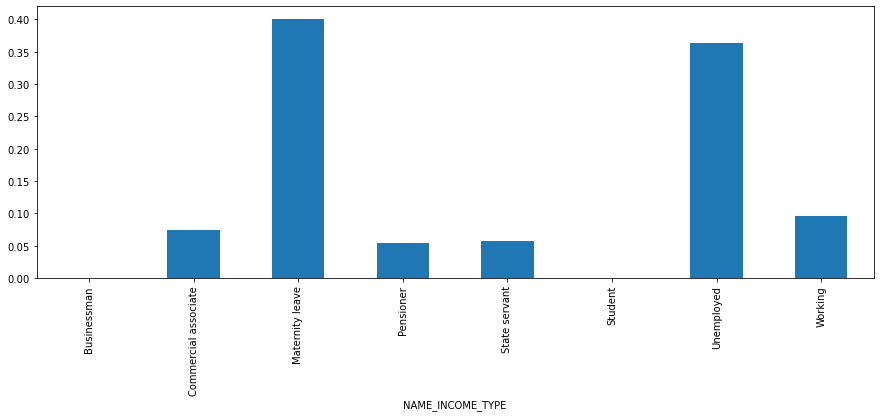

NAME_EDUCATION_TYPE


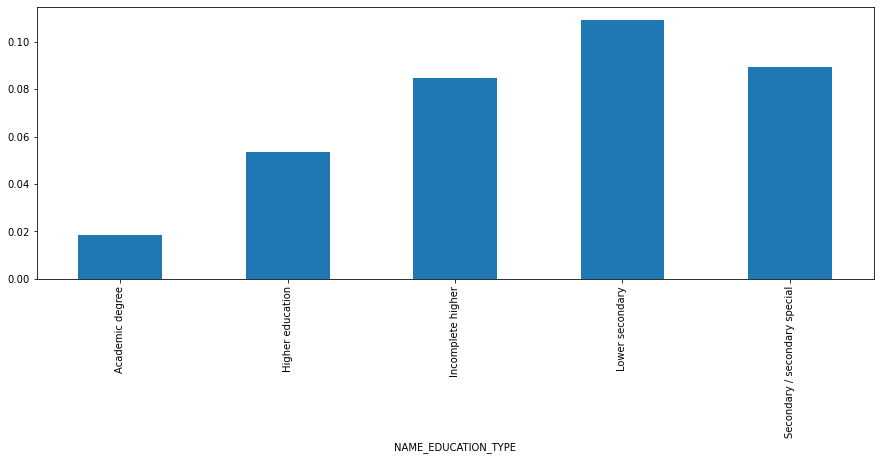

NAME_FAMILY_STATUS


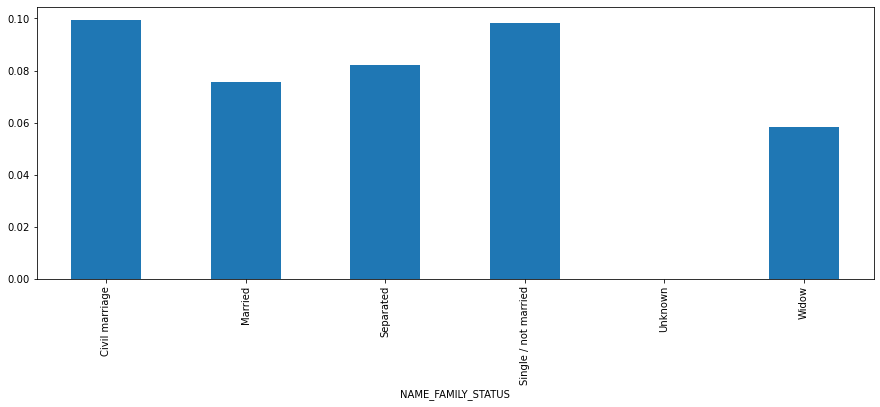

NAME_HOUSING_TYPE


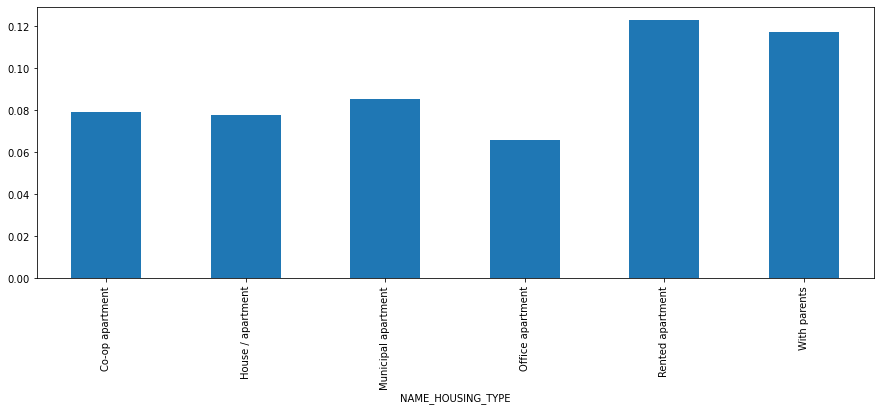

OCCUPATION_TYPE


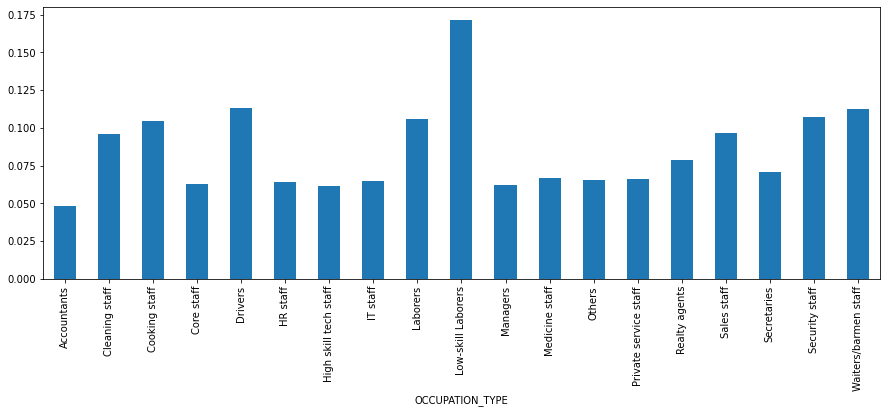

WEEKDAY_APPR_PROCESS_START


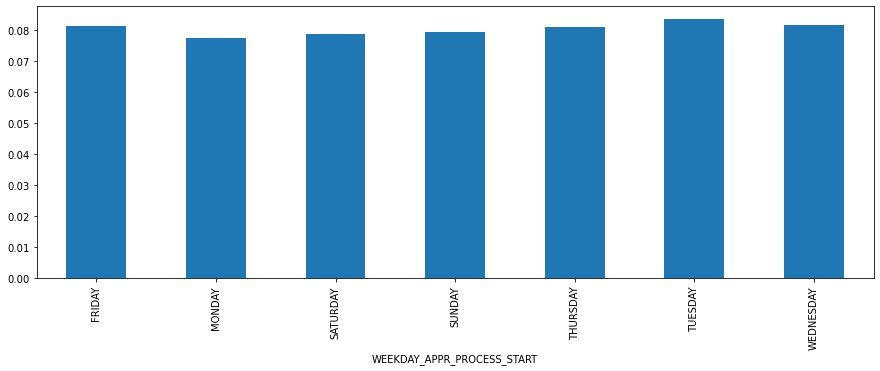

ORGANIZATION_TYPE


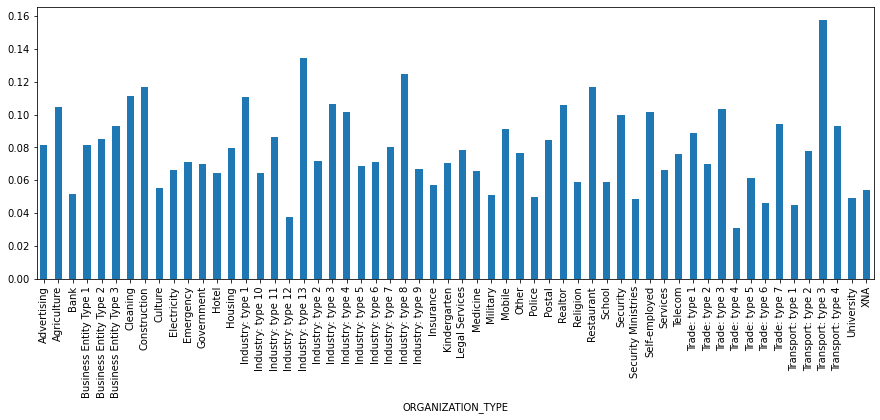

In [156]:
for x in categorical_column_APP:
    print(x)
    plt.figure(figsize = [15,5])
    AD.groupby(x)['TARGET'].mean().plot.bar()
    plt.show()

### Multivariate_Analysis

### NAME_INCOME_TYPE vs NAME_EDUCATION_TYPE vs TARGET

In [157]:
MV_res1 = pd.pivot_table(data = AD,index = 'NAME_INCOME_TYPE', columns = 'NAME_EDUCATION_TYPE',values = 'TARGET')
MV_res1

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
NAME_INCOME_TYPE,,,,,
Businessman,NaN,0.000000,NaN,NaN,NaN
Commercial associate,0.023256,0.051738,0.082059,0.121739,0.086544
Maternity leave,NaN,0.000000,NaN,NaN,1.000000
Pensioner,0.000000,0.041524,0.044402,0.066710,0.055808
State servant,0.000000,0.038813,0.067532,0.078431,0.070741
Student,NaN,0.000000,0.000000,NaN,0.000000
Unemployed,NaN,0.000000,0.333333,NaN,0.538462
Working,0.027778,0.061667,0.092569,0.145507,0.105177


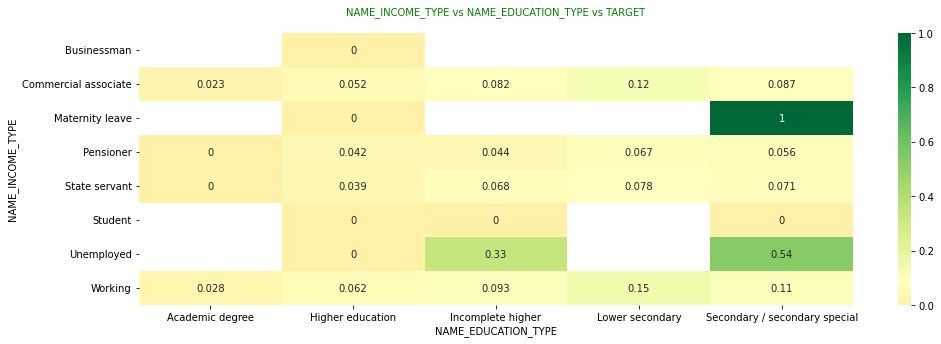

In [158]:
plt.figure(figsize = [16,5])
plt.title("NAME_INCOME_TYPE vs NAME_EDUCATION_TYPE vs TARGET\n", fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Green'})
sns.heatmap(MV_res1,annot = True,cmap = 'RdYlGn',center = 0.080729)
plt.show()

### NAME_HOUSING_TYPE vs NAME_EDUCATION_TYPE Vs TARGET

In [159]:
MV_res2 = pd.pivot_table(data = AD,index = 'NAME_HOUSING_TYPE', columns = 'NAME_EDUCATION_TYPE',values = 'TARGET')
MV_res2

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
NAME_HOUSING_TYPE,,,,,
Co-op apartment,0.000000,0.081800,0.050000,0.000000,0.081996
House / apartment,0.020408,0.052062,0.081281,0.105115,0.086323
Municipal apartment,0.000000,0.057464,0.081433,0.122744,0.089675
Office apartment,0.000000,0.041199,0.030928,0.121951,0.078209
Rented apartment,0.000000,0.063970,0.115385,0.126582,0.142356
With parents,0.000000,0.073232,0.110132,0.148649,0.135323


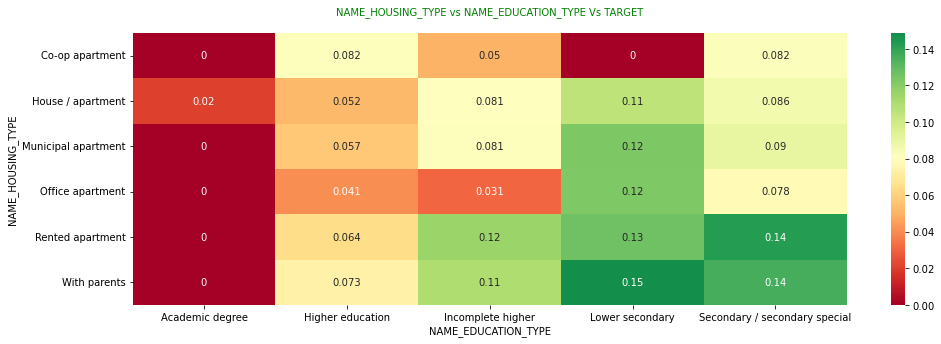

In [160]:
plt.figure(figsize = [16,5])
plt.title("NAME_HOUSING_TYPE vs NAME_EDUCATION_TYPE Vs TARGET\n", fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Green'})
sns.heatmap(MV_res2,annot = True,cmap = 'RdYlGn',center = 0.080729)
plt.show()